### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

### Data Wrangling

In [1]:
#load the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
data = pd.read_json("ultimate_data_challenge.json")
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


### Data Definition

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [3]:
data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [4]:
data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [5]:
#Converting the date fields to datetime datatype
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [6]:
#summary statistics
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [7]:
#eviewing the column names, non-null values, datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [8]:
#checking the count of unique values for each column
data.nunique()

city                         3
trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        37
avg_surge                  115
last_trip_date             182
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        27
dtype: int64

In [9]:
data['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [10]:
#Checking the range of values
data.agg({'min','max'})

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
max,Winterfell,125,2014-01-31,5.0,8.0,2014-07-01,100.0,True,100.0,160.96,5.0
min,Astapor,0,2014-01-01,1.0,1.0,2014-01-01,0.0,False,0.0,0.00,1.0


In [11]:
data.shape

(50000, 12)

### Data Cleaning

In [12]:
data.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver       True
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver       True
dtype: bool

In [13]:
data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [14]:
data[data['avg_rating_of_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


In [15]:
data['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

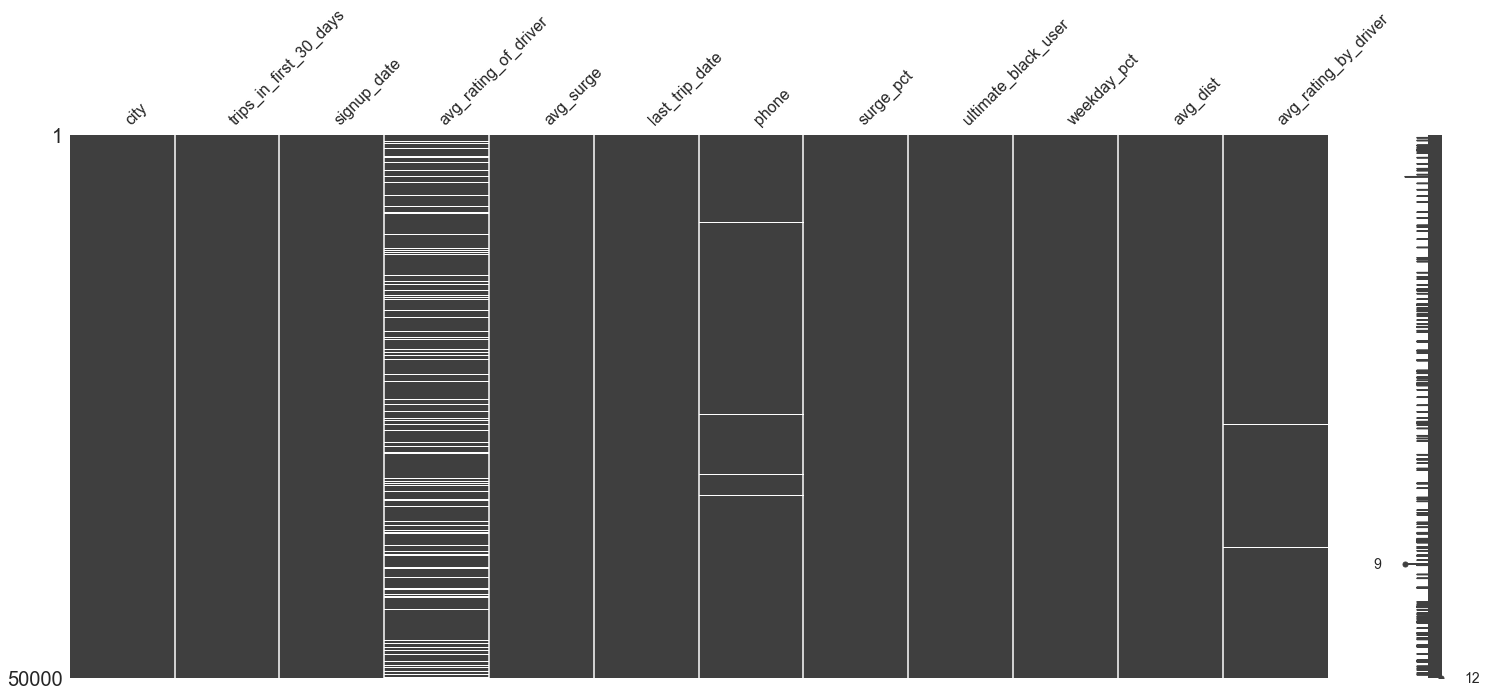

In [16]:
#visualizing missingness
import missingno as msno
msno.matrix(data)
plt.show()

Summary findings:

- There is no relation ship between variables for missing values.
- We can conclude that missingness is purely due to randomness.

In [17]:
#filling the NaN values
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean(),inplace = True)
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean(),inplace = True)
data['phone'].fillna('UNKNOWN',inplace = True)

In [18]:
#Checking the duplicate values
data.duplicated().any(), data.duplicated().sum()

(True, 8)

In [19]:
#dropping the duplicate values
data.drop_duplicates(inplace = True)

In [20]:
data.shape

(49992, 12)

## Exploratory Data Analysis

Since the data is pulled at 2014-07-01, we should consider that the user is active if the user made a trip preceding 30 days of 2014-07-01.

In [21]:
import datetime
start = data['last_trip_date'].max() - datetime.timedelta(30)

In [22]:
data['active'] = [1 if x > start else 0 for x in data['last_trip_date']]

In [23]:
print('The percentage of active users are: ', data.active.sum()/len(data.active))

The percentage of active users are:  0.3662586013762202


<AxesSubplot:>

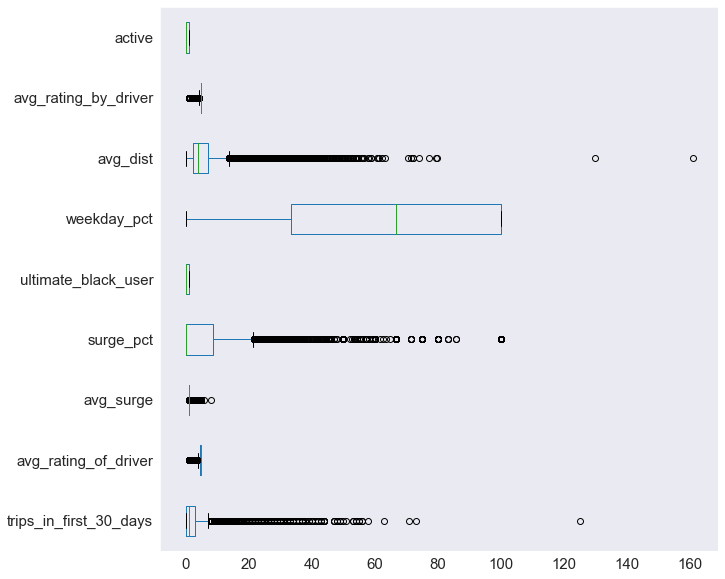

In [24]:
#checking the outliers
data.boxplot(vert = False,grid = False,fontsize  =15,figsize = (10,10))

array([[<AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'avg_dist'}>,
        <AxesSubplot:title={'center':'avg_rating_by_driver'}>],
       [<AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>,
        <AxesSubplot:title={'center':'surge_pct'}>],
       [<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>, <AxesSubplot:>]],
      dtype=object)

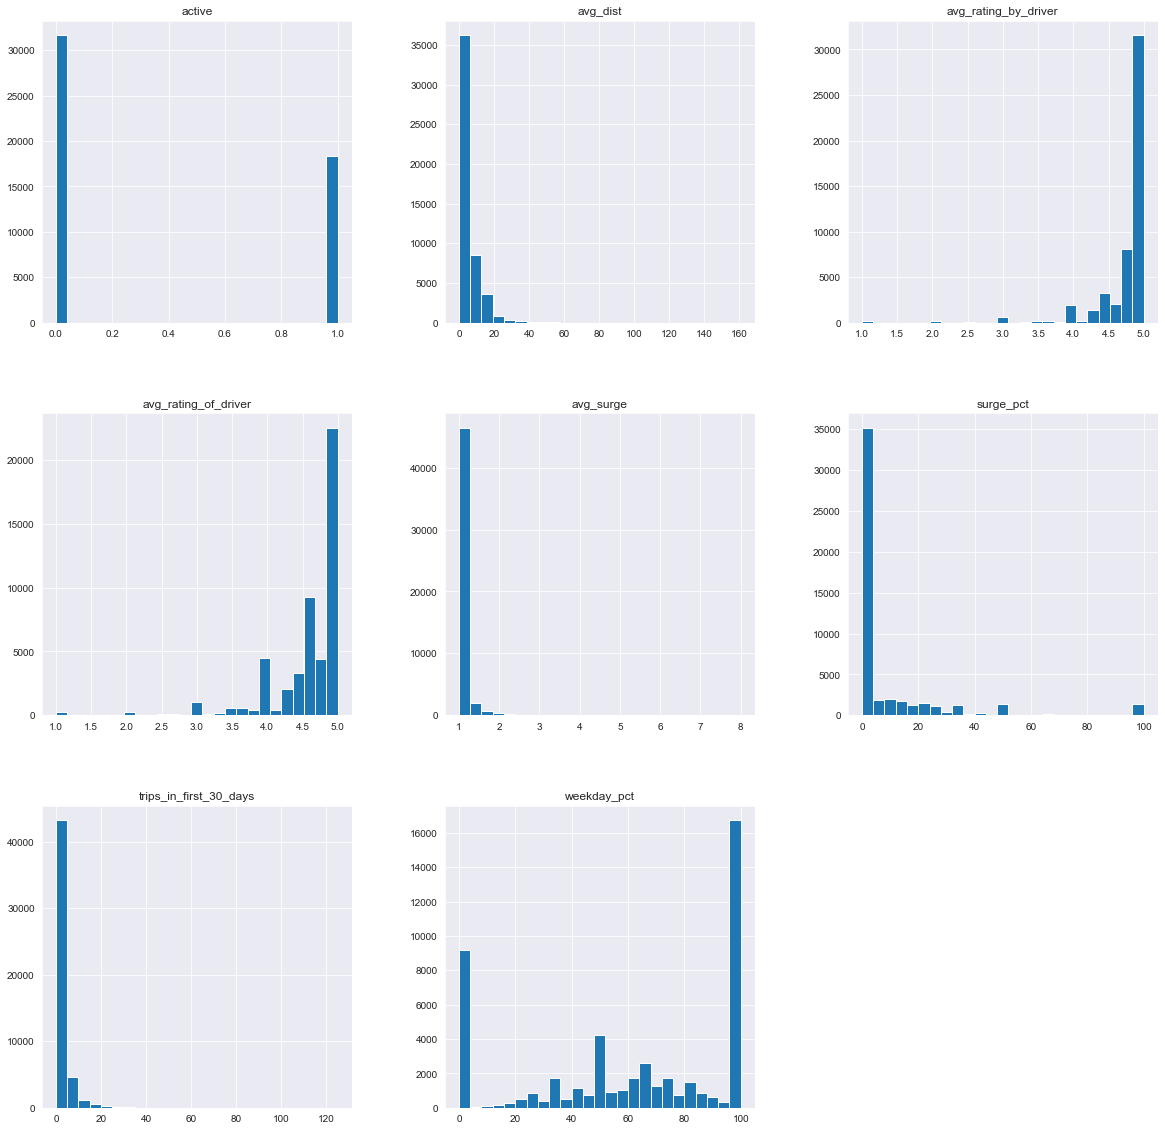

In [25]:
data.drop(['ultimate_black_user'],axis=1).hist(bins = 25,figsize=(20,20))

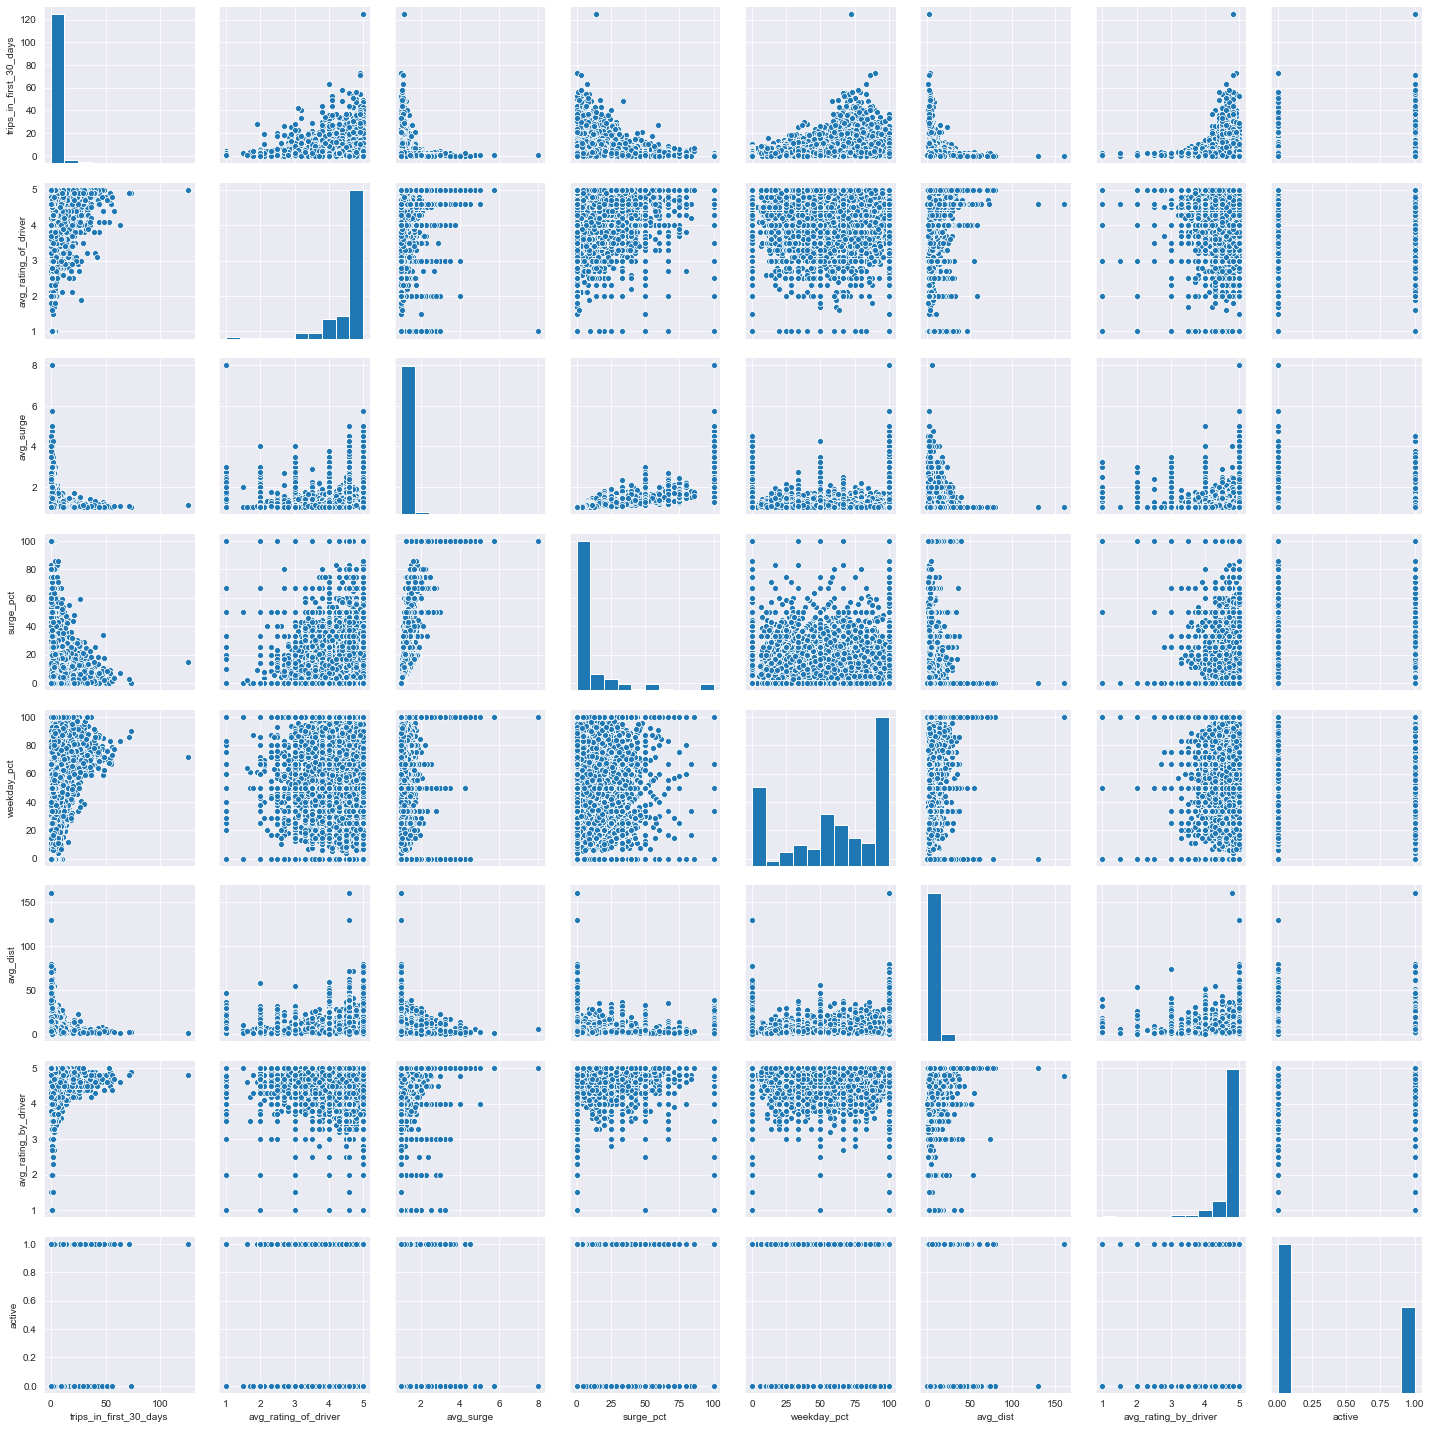

In [80]:
#Explore data relationships
sns.pairplot(data.drop(['ultimate_black_user'],axis=1))

<AxesSubplot:>

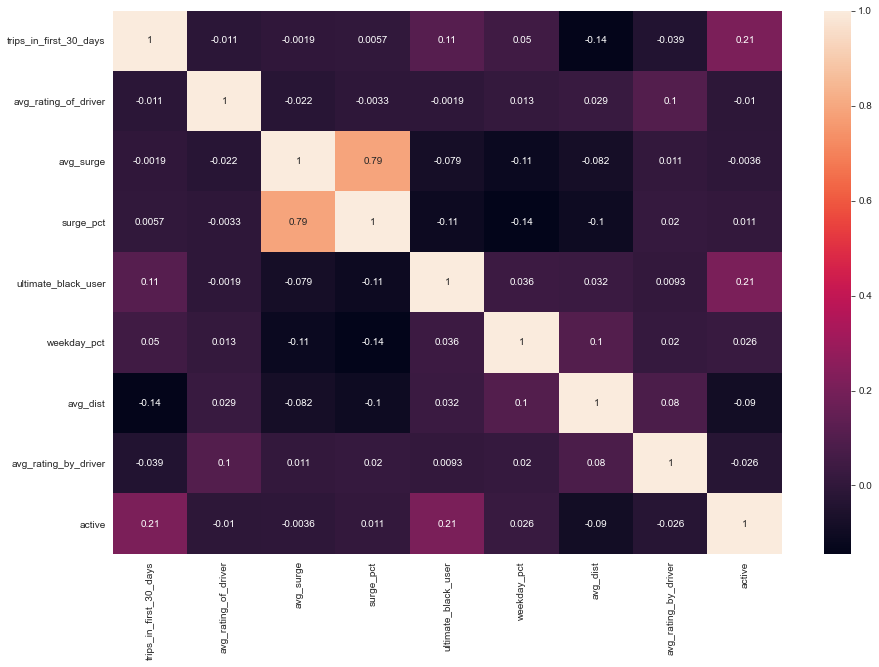

In [26]:
#Heat map - Correlation between features
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot = True)

Summary Findings:

- Users retention is slightly positively correlated with the features trips_in_first_30_days and ultimate_black_user. And it has a high negative correlation with avg_dist.
- And some of the columns shows only minimal correlation. 

In [27]:
data.select_dtypes(include = 'object').columns

Index(['city', 'phone'], dtype='object')

Text(0.5, 1.0, 'Ultimate accounts by city')

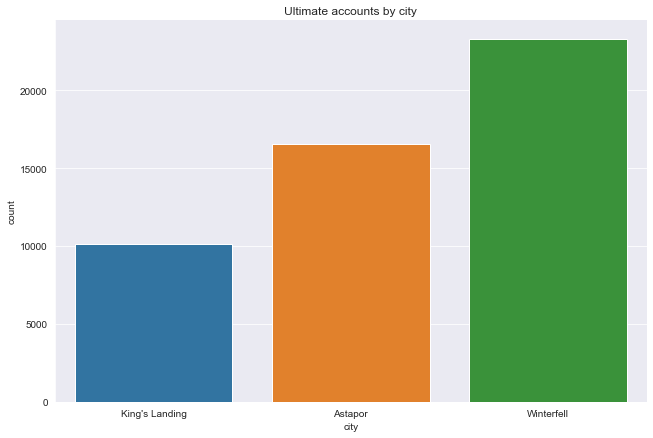

In [28]:
#Now lets explore each variable in detail 
#Exploring the city varibale
sns.catplot(x = 'city', kind = 'count', data = data, height=6, aspect=1.5)
plt.title("Ultimate accounts by city")


Summary findings:

- The plot witnessed that there are more users in Winterfell who signed up for ultimate account.

Text(0.5, 1.0, 'Ultimate accounts per city hue by retention')

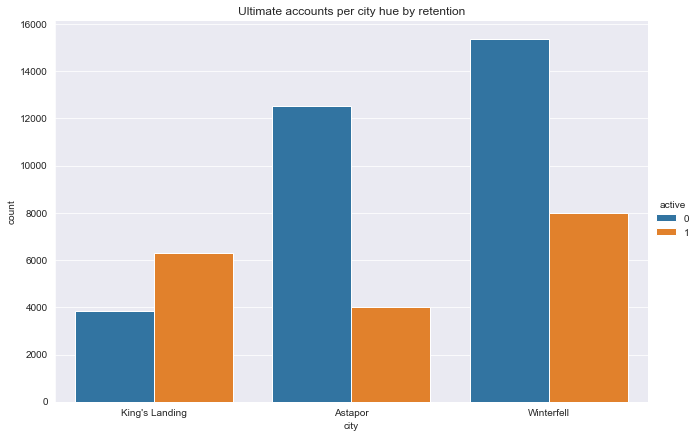

In [29]:
#Exploring the city variable by user's retention
sns.catplot(x = 'city', kind = 'count', data = data, height=6, aspect=1.5, hue = 'active')
plt.title("Ultimate accounts per city hue by retention")

Summary Findings:

- Winterfell has more active users followed by Kings'Landing.

Now lets explore the sign up date.

Text(0.5, 1.0, 'signup days over entire time frame')

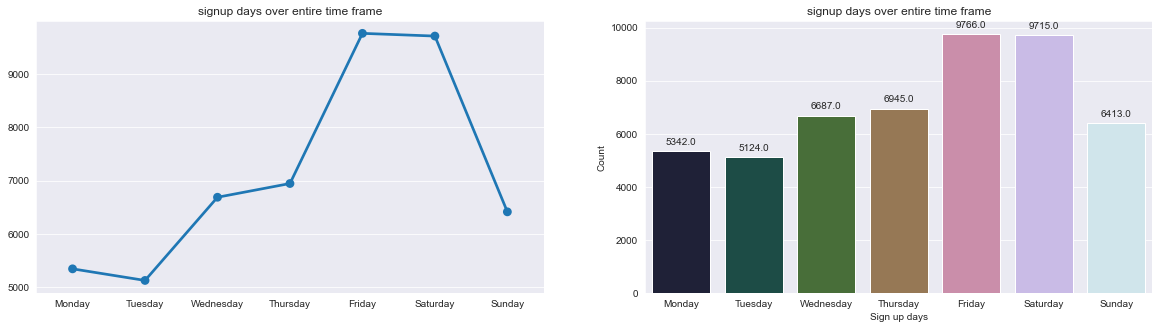

In [30]:
plt.figure(figsize = (20,5))

ax1 = plt.subplot(1,2,1)
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.pointplot(x = data.signup_date.dt.day_name().value_counts().index, 
              y = data.signup_date.dt.day_name().value_counts().values, 
              order = Days,ax = ax1)
plt.title("signup days over entire time frame")


ax2 = plt.subplot(1,2,2)
splot = sns.barplot(x = data.signup_date.dt.day_name().value_counts().index, 
                    y = data.signup_date.dt.day_name().value_counts().values, 
                    palette="cubehelix",order = Days,ax = ax2)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Sign up days")
plt.ylabel("Count")
ax2.set_title("signup days over entire time frame")



Summary Findings:

- Saturday and Sunday have the more users signup users and Tuesday has the least signup users.

Now lets explore the day of week user signed up by their retention.

In [31]:
data['signup_day_of_week'] = data.signup_date.dt.day_name()
data['signup_day'] = data.signup_date.dt.dayofweek
data['signup_year'] = data.signup_date.dt.year
data['signup_month'] = data.signup_date.dt.month

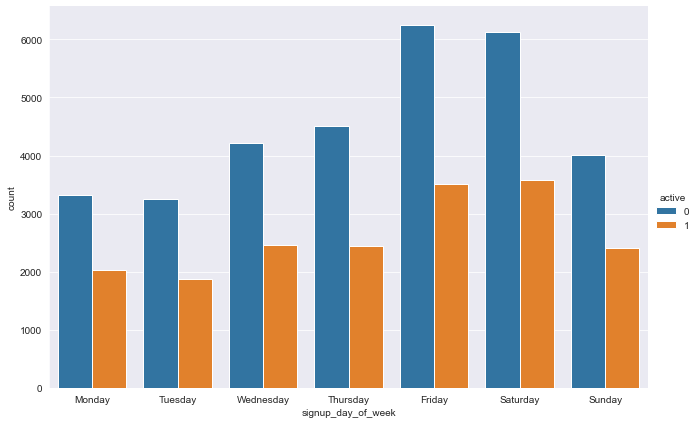

In [32]:
#visualizing the day of week user signed up by their retention.
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.catplot(x = 'signup_day_of_week',kind = 'count',data = data,order = Days, 
            hue = 'active', height = 6, aspect  =1.5)

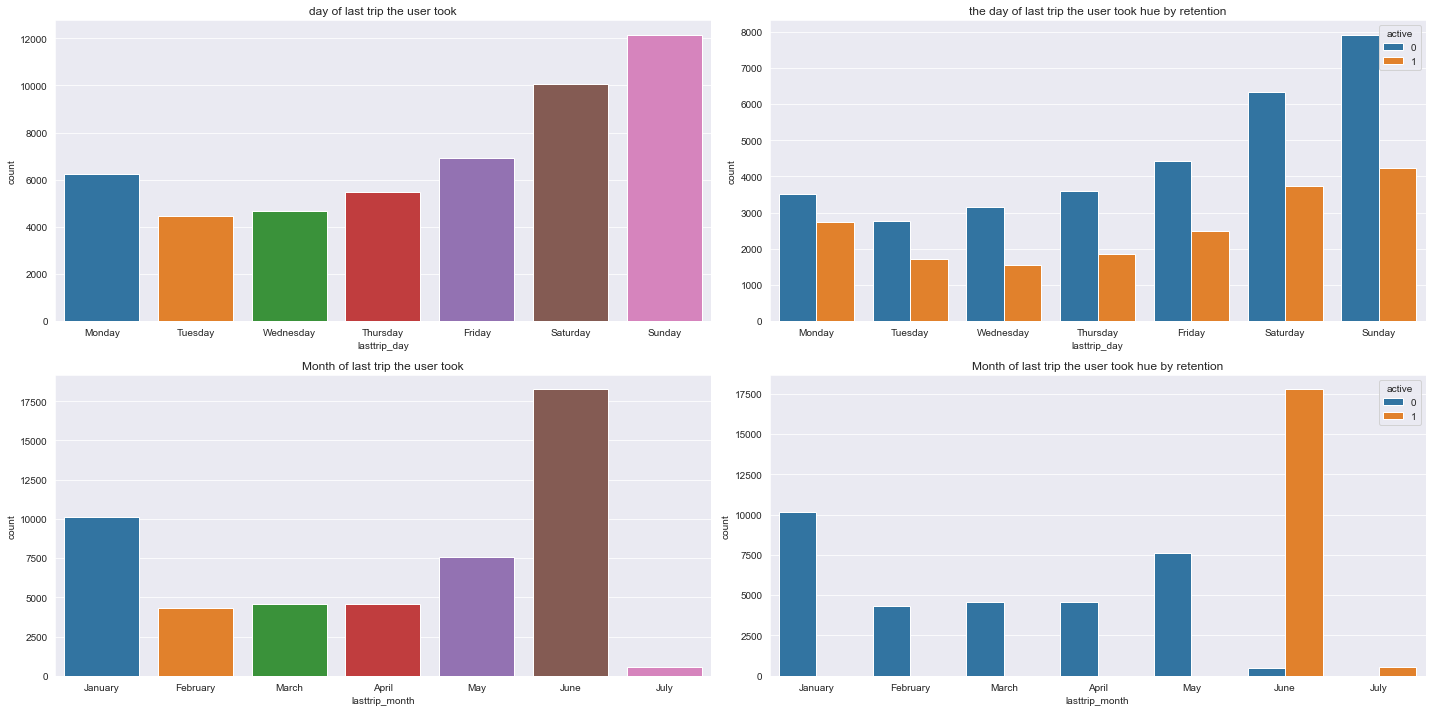

In [33]:
#Now lets explore the day of last trip the user took
data['lasttrip_day'] = data.last_trip_date.dt.day_name()
data['lasttrip_month'] = data.last_trip_date.dt.month_name()

 
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Months = ['January','February','March','April','May','June','July']

#plt.figure(figsize = (20,5))
fig, ax =plt.subplots(2,2,figsize = (20,10))
ax = ax.flatten()

#ax1 = plt.subplot(2,2,1)
ax[0].set_title("day of last trip the user took")
sns.countplot(data['lasttrip_day'], order = Days, ax=ax[0])



#ax2 = plt.subplot(2,2,2)
ax[1].set_title("the day of last trip the user took hue by retention")
sns.countplot(data['lasttrip_day'], order = Days,hue = 'active', ax=ax[1], data = data)


#ax3 = plt.subplot(2,2,3)
sns.countplot(data['lasttrip_month'], order = Months, ax=ax[2])
ax[2].set_title("Month of last trip the user took")

#ax4 = plt.subplot(2,2,4)
sns.countplot(data['lasttrip_month'], order = Months, hue = 'active', ax=ax[3], data = data)
ax[3].set_title("Month of last trip the user took hue by retention")
fig.tight_layout()

Summary findings:

- From the above plot we witnessed that the users who took their last trip in June are active from that month onwards.

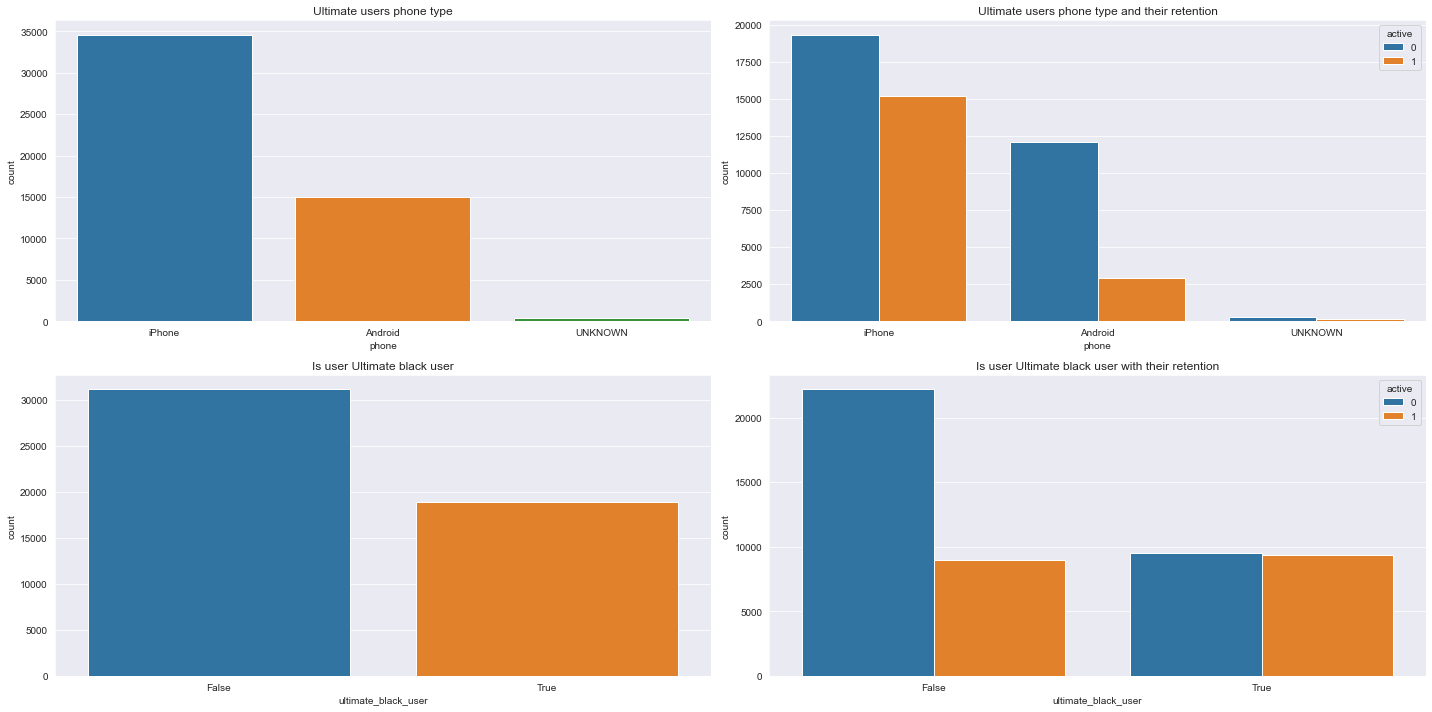

In [34]:
#Visualizing the phone and ultimate_black_user and their relationship with the target varibale.
fig, ax = plt.subplots(2,2,figsize = (20,10))
ax = ax.flatten()

ax[0].set_title("Ultimate users phone type")
sns.countplot(data['phone'],ax = ax[0])

ax[1].set_title("Ultimate users phone type and their retention")
sns.countplot(data['phone'], data = data, hue = 'active',ax = ax[1])

ax[2].set_title("Is user Ultimate black user")
sns.countplot(data['ultimate_black_user'],ax = ax[2])

ax[3].set_title("Is user Ultimate black user with their retention")
sns.countplot(data['ultimate_black_user'], hue = data['active'],ax = ax[3])


fig.tight_layout()

Summary Findigs:

- Most of the users are using iphone and more than half of them are retained.
- Most of the user are not ultimate black users and the all most all the users who are ultimate black users are reatined. And less than half of the users who are not ultimate black users are retained.

Text(0.5, 1.0, 'Ultimate users retention')

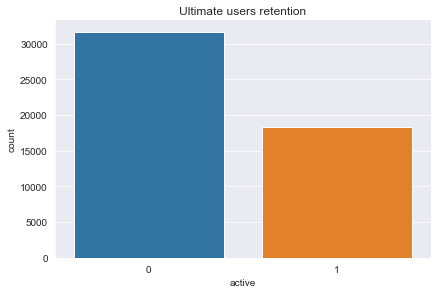

In [35]:
#Distribution of target variable
sns.catplot(x = 'active', kind = 'count', data = data, height=4, aspect=1.5)
plt.title("Ultimate users retention")

<AxesSubplot:xlabel='active'>

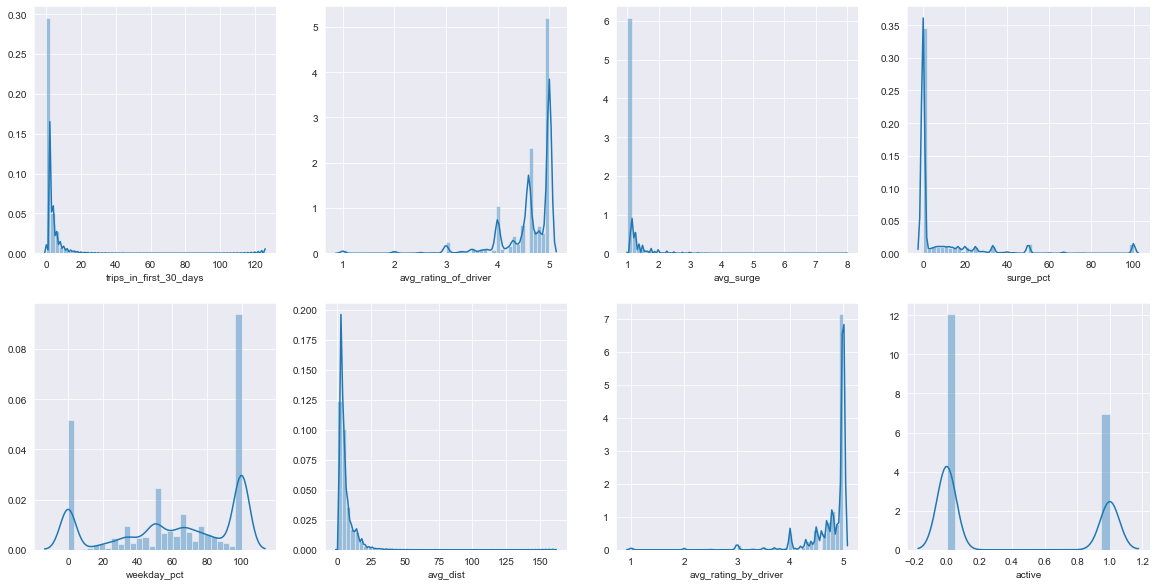

In [36]:
#Lets explore the distribution of numerical features
#plt.figure(figsize = (8,5))

plt.figure(figsize = (20,10))

ax = plt.subplot(2,4,1)
sns.distplot(data['trips_in_first_30_days'])

ax = plt.subplot(2,4,2)
sns.distplot(data['avg_rating_of_driver'])

ax = plt.subplot(2,4,3)
sns.distplot(data['avg_surge'])

ax = plt.subplot(2,4,4)
sns.distplot(data['surge_pct'])

ax = plt.subplot(2,4,5)
sns.distplot(data['weekday_pct'])

ax = plt.subplot(2,4,6)
sns.distplot(data['avg_dist'])

ax = plt.subplot(2,4,7)
sns.distplot(data['avg_rating_by_driver'])

ax = plt.subplot(2,4,8)
sns.distplot(data['active'])


Summary Findings:

- The distribution of trips_in_first_30_days, avg_surge, sutge_pct and avg_dist are heavily right skewed. And the distribution of avg_rating_of_driver , avg_rating_by_driver are left skewed. From the above plot we can conlude that their mean is affected by the outliers.
- We also witnessed that weekday_pct, active features have bimodal distribution.


### Preprocessing

#### Encoding categorical variables

In [37]:
data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'signup_day_of_week', 'signup_day',
       'signup_year', 'signup_month', 'lasttrip_day', 'lasttrip_month'],
      dtype='object')

In [38]:
#removing unneccesary columns
data.drop(['signup_date','last_trip_date','lasttrip_month','lasttrip_day','signup_day_of_week'],
          axis = 1,inplace = True)

In [39]:
data['ultimate_black_user'] = data['ultimate_black_user'].astype('int') 

In [40]:
#get dummies for categorical variables
data = pd.get_dummies(data)

#### Split the data into train and test

In [41]:
# Split the data 
from sklearn.model_selection import train_test_split
X = data.drop(['active'],axis= 1)
y = data.active

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#### Scale the data

In [42]:
#Scale the data
from sklearn.preprocessing import StandardScaler
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Modeling

Since we are trying to predict whether the user will 

In [43]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

### Evaluating the models

>SVM 0.770 (0.005)
For  SVC(gamma='auto', probability=True) :
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      6380
           1       0.72      0.58      0.65      3619

    accuracy                           0.77      9999
   macro avg       0.76      0.73      0.74      9999
weighted avg       0.76      0.77      0.76      9999

ROC_AUC:0.8188272492531147


>KNN 0.743 (0.003)
For  KNeighborsClassifier() :
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      6380
           1       0.65      0.60      0.63      3619

    accuracy                           0.74      9999
   macro avg       0.72      0.71      0.71      9999
weighted avg       0.74      0.74      0.74      9999

ROC_AUC:0.7772528262106733


>RF 0.771 (0.001)
For  RandomForestClassifier(n_estimators=500, warm_start=True) :
               precision    recall  f1-score   support

           0       0.81      0.84   

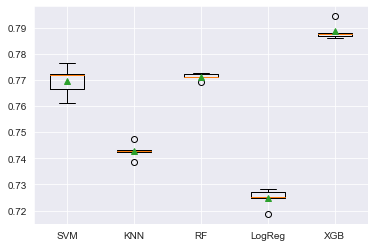

Choosing the best model:
                      SVM       KNN        RF    LogReg       XGB
train_accuracy  0.777411  0.819193   0.99965  0.724902  0.842272
test_accuracy   0.768577  0.740574  0.769477  0.722872  0.790679
precision       0.724304   0.65395  0.693805  0.659518  0.733191
recall          0.582205  0.601547  0.649903  0.484388   0.66289
F1              0.645527  0.626655  0.671137  0.558547   0.69627
AUC             0.818827  0.777253  0.832359  0.765488  0.855536
CPU times: user 7min 42s, sys: 4.08 s, total: 7min 47s
Wall time: 15min 15s


In [144]:
%%time
# define models to test
def get_models():
    models, names = list(), list()
    
    # SVM
    models.append(SVC(gamma='auto',probability=True))
    names.append('SVM')
    
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    # RF
    models.append(RandomForestClassifier(n_estimators=500,warm_start=True))
    names.append('RF')
    
    # ET
    #models.append(ExtraTreesClassifier(n_estimators=500))
    #names.append('ET')
    
    #LogisticRegression
    models.append(LogisticRegression())
    names.append('LogReg')
    
    #XGB
    models.append(xgb.XGBClassifier())
    names.append('XGB')
    return models, names

# define models
models, names = get_models()
results = list()

# Create Datframe to compare models
metrics = pd.DataFrame(index=['train_accuracy','test_accuracy', 'precision', 'recall','F1', 'AUC'], 
                       columns=names)


# evaluate each model
for i in range(len(models)):
    
    classifier = models[i].fit(X_train,y_train)
    
    # evaluate the model and store results
    cv = StratifiedKFold(n_splits = 5, shuffle=False, random_state = 1)
    scores = cross_val_score(models[i], X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    
    metrics.loc['train_accuracy',names[i]] = classifier.score(X_train,y_train)
    metrics.loc['test_accuracy',names[i]] =  accuracy_score(y_test,y_pred)  
    metrics.loc['precision',names[i]] = precision_score(y_test,y_pred)
    metrics.loc['recall',names[i]] = recall_score(y_test,y_pred)
    metrics.loc['F1',names[i]] = f1_score(y_test,y_pred)
    metrics.loc['AUC',names[i]] = roc_auc_score(y_test,y_pred_proba)
    
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
    print("For ",models[i],":\n" ,classification_report(y_test,y_pred))
    print(f"ROC_AUC:{roc_auc_score(y_test,y_pred_proba)}\n\n")
    
    
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.show()
print("Choosing the best model:\n",metrics)


### Choosing the best model

In [145]:
metrics

,SVM,KNN,RF,LogReg,XGB
train_accuracy,0.777411,0.819193,0.99965,0.724902,0.842272
test_accuracy,0.768577,0.740574,0.769477,0.722872,0.790679
precision,0.724304,0.65395,0.693805,0.659518,0.733191
recall,0.582205,0.601547,0.649903,0.484388,0.66289
F1,0.645527,0.626655,0.671137,0.558547,0.69627
AUC,0.818827,0.777253,0.832359,0.765488,0.855536


Summary Findings:

- from the above chart it is evident that XGBoost outpeformed all other models followed by RandomForest.

Now let do hyper parameter tunning for better accuracy.

### Optimizing Gradient Boosting through Hyper parameter tuning

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.feature_selection import SelectKBest, chi2
# Define our search space for grid search
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'clf__gamma': [i/10.0 for i in range(3)],
    'fs__score_func': [chi2],
    'fs__k': [10],
  }
]

parameters = {'gbc__n_estimators': np.arange(400,1000,100), 'gbc__max_features':[None,'sqrt','log2']}
# Define cross validation
cross_val = StratifiedKFold(n_splits=5,shuffle=True, random_state = 1)
# AUC and accuracy as score
scoring = {'Recall': make_scorer(recall_score,average = 'weighted'),
           'f1_score': make_scorer(f1_score,average = 'weighted'),
           'precision': make_scorer(precision_score,average = 'weighted'),
           'Accuracy': make_scorer(accuracy_score),
           'AUC':'roc_auc'
          }
#scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

clf = xgb.XGBClassifier(objective='binary:logistic')
# Define grid search
grid = GridSearchCV(
  clf,
  param_grid=parameters,
  cv=cross_val,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.0min finished


[16:31:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { gbc__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [151]:
predict = model.predict(X_test)
print('Best AUC Score: {}'.format(model.best_score_))
print('Accuracy: {}'.format(accuracy_score(y_test, predict)))
print(confusion_matrix(y_test,predict))

#And the best parameters can be obtained by:
print(model.best_params_)

Best AUC Score: 0.8571099010479839
Accuracy: 0.7906790679067907
[[5507  873]
 [1220 2399]]
{'gbc__max_features': None, 'gbc__n_estimators': 400}


### Final Model

In [44]:
#XGBoostClassifier 

gbc = xgb.XGBClassifier(objective='binary:logistic',max_feature= None, 
                        n_estimators= 400, random_state = 1,n_jobs=-1)
model = gbc.fit(X_train, y_train)

cv = StratifiedKFold(n_splits = 5, shuffle=False, random_state = 1)

# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print("train accuracy: ",model.score(X_train,y_train))
print("test accuracy: ", model.score(X_test,y_test))
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

train accuracy:  0.9089840722126372
test accuracy:  0.7861786178617862
Accuracy=0.786
f1-score=0.784
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6380
           1       0.72      0.66      0.69      3619

    accuracy                           0.79      9999
   macro avg       0.77      0.76      0.76      9999
weighted avg       0.78      0.79      0.78      9999

[[5460  920]
 [1218 2401]]


### Confusion matrix and ROC curves

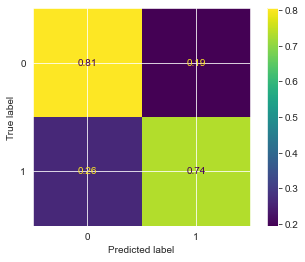

<Figure size 576x576 with 0 Axes>

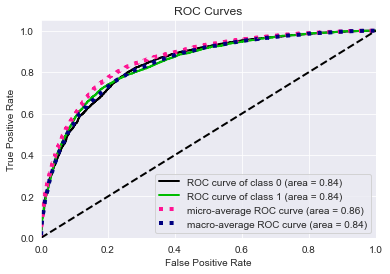

In [61]:
# Plot Confsion Matrix and ROC Curve
import scikitplot as skplt
plot_confusion_matrix(rf_weight, X_test, y_test,normalize='true')
plt.figure(figsize=(8,8))
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
plt.show()

### Feature Importance

In [57]:
# Get numerical feature importances
importances = list(gbc.feature_importances_)
feature_list = list(X.columns)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

Variable: city_King's Landing Importance: 0.25
Variable: phone_iPhone Importance: 0.14000000059604645
Variable: phone_Android Importance: 0.11999999731779099
Variable: avg_rating_by_driver Importance: 0.10999999940395355
Variable: surge_pct Importance: 0.07000000029802322
Variable: ultimate_black_user Importance: 0.07000000029802322
Variable: city_Astapor Importance: 0.05999999865889549
Variable: weekday_pct Importance: 0.03999999910593033
Variable: trips_in_first_30_days Importance: 0.029999999329447746
Variable: avg_rating_of_driver Importance: 0.019999999552965164


[None, None, None, None, None, None, None, None, None, None]

17


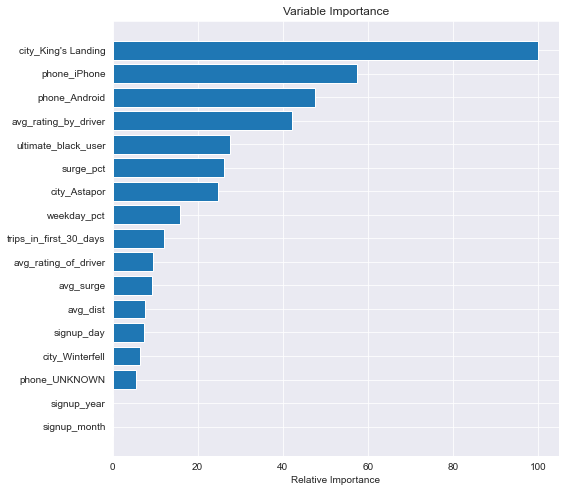

In [50]:
feature_importance = gbc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


### Conclusion

We tried 5 models, out of which XGBoost gave us the better accuracy of 79%. The top most important features is king'Landing city followed by iPhone of phone feature. 

### Ultimate may consider the following actions to improve its longterm rider retention:

- Target the King's landing consumer base, or study these customers more closely for additional insight
- Improve the iphone,Android application user experience
- Offer ultimate black trip discounts for new users
- Marketing promotions for users who take intermediate trips, promoting weekday travel during surge pricing.
- Encourage users to use the service in their first 30 days through discounts and promotions.
